In [1]:
import os
import random

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm

In [19]:
raw_dir = '../data/downloaded_raw'
out_dir = '../data/processed_dat'

sorted(os.listdir(raw_dir))

['.~lock.M830202 - Divorce Rates, Annual_cleaned.csv#',
 'M830202 - Divorce Rates, Annual.csv',
 'M830202 - Divorce Rates, Annual_cleaned.csv',
 'README.md',
 'agegroup_grooms_brides.csv',
 'agegroup_grooms_brides.ods',
 'death_rate_agespecific.csv',
 'death_rate_agespecific_cleaned.csv',
 'demographic_ethnicity.csv',
 'input_birth_fertility_rates_sin_1961-2018.csv',
 'input_birth_fertility_rates_sin_1961-2018_cleaned.csv',
 'input_birth_number_by_age_1980-2018.csv',
 'input_birth_number_by_order_sin_1967-2018.csv',
 'input_lifetable_sin_2003-2017.csv',
 'input_marriage_rates_sin_1980-2017.csv',
 'input_marriage_rates_sin_1980-2017_cleaned.csv',
 'input_marriage_rates_sin_1980-2017_v2.csv',
 'input_proportion_singles_age_sin_1980-2018.csv',
 'input_relationship_status_sin_1980-2018.csv',
 'input_relationship_status_sin_1980-2018_cleaned.csv',
 'inter-ethnic-marriage.csv',
 'inter-ethnic-marriage.ods',
 'mariage_by_ethnics.csv']

In [3]:
df0 = pd.read_csv(os.path.join(raw_dir, 'input_relationship_status_sin_1980-2018_cleaned.csv'))

In [4]:
df0.head()

,Gender,Age,Variables,1980,1983,1984,1985,1986,1987,1988,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,All,20-29,Total,505000,545900,536100,534300,539200,538600,525100,...,477400,503800,498400,504100,491700,505500,501100,525800,500600,509700
1,All,20-29,Single,329600,377400,369600,375700,382400,378500,374500,...,379700,397100,409200,425200,415400,436500,424200,441200,420500,431200
2,All,20-29,Married,172700,166300,164300,155900,154200,157500,147400,...,94000,102400,85200,75900,73400,67000,73700,81900,77800,76100
3,All,20-29,Widowed,600,600,300,200,600,300,500,...,100,200,100,100,0,100,0,200,100,100
4,All,20-29,Divorced/Separated,2100,1500,2000,2400,2000,2300,2700,...,3600,4100,3900,3000,2800,1900,3000,2500,2200,2300


In [5]:
origin_years = [1990, 2000, 2010]

In [7]:
df1 = df0[df0['Gender']=='All']
#all_ages = list(set(df1.Age.tolist()))
df1 = df1[['Age', 'Variables']+[str(y) for y in origin_years]]
df2 = df1.groupby('Variables')[[str(y) for y in origin_years]].sum()
df2

,1990,2000,2010
Variables,,,
Divorced/Separated,27800,61800,103100
Married,1174700,1542100,1843900
Single,527500,550000,730300
Total,1857400,2283100,2834800
Widowed,127300,129200,157500


In [8]:
df3 = df2.T
df3

Variables,Divorced/Separated,Married,Single,Total,Widowed
1990,27800,1174700,527500,1857400,127300
2000,61800,1542100,550000,2283100,129200
2010,103100,1843900,730300,2834800,157500


In [9]:
df3['Separated_rate'] = df3['Divorced/Separated'] / df3['Total']
df3['Married_rate'] = df3['Married'] / df3['Total']

df3

Variables,Divorced/Separated,Married,Single,Total,Widowed,Separated_rate,Married_rate
1990,27800,1174700,527500,1857400,127300,0.014967,0.632443
2000,61800,1542100,550000,2283100,129200,0.027068,0.675441
2010,103100,1843900,730300,2834800,157500,0.036369,0.650452


In [10]:
df3.to_csv(os.path.join(out_dir, 'relationship_status_3years.csv'))

In [11]:
df1.head()

,Age,Variables,1990,2000,2010
0,20-29,Total,516000,458000,503800
1,20-29,Single,347900,313200,397100
2,20-29,Married,163400,140000,102400
3,20-29,Widowed,1800,1700,200
4,20-29,Divorced/Separated,2800,3200,4100


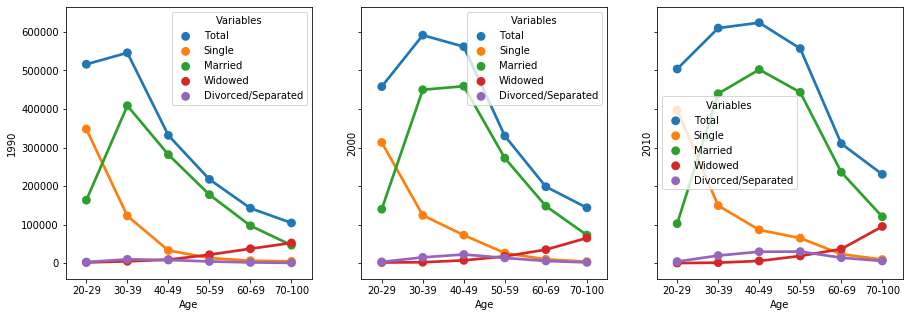

In [18]:
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
sns.pointplot(x='Age', y='1990', hue='Variables', data=df1, ax=axs[0])
sns.pointplot(x='Age', y='2000', hue='Variables', data=df1, ax=axs[1])
sns.pointplot(x='Age', y='2010', hue='Variables', data=df1, ax=axs[2])

In [20]:
dfb0 = pd.read_csv(os.path.join(raw_dir, 'input_marriage_rates_sin_1980-2017_cleaned.csv'))
dfb0.head()

,gender,age_group,1980,1981,1982,1983,1984,1985,1986,1987,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Male,total,54.9,58.4,54.5,46.9,57.7,54.3,45.6,53.3,...,43.5,43.4,39.3,43.5,43.8,40.5,44.4,44.2,44.4,45.7
1,Male,15-19,1.7,1.6,1.6,1.4,1.5,1.2,1.0,1.0,...,0.9,0.8,0.7,0.7,0.6,0.6,0.5,0.6,0.4,0.4
2,Male,20-24,49.9,51.8,46,38.8,44.7,43.8,35.8,37.9,...,14.4,12.7,11.7,11.1,12.2,10.9,10.7,10.1,9.2,9.3
3,Male,25-29,140.1,138,126.3,104.9,122.2,110.3,87.3,104.1,...,83.0,79.5,71.8,79.6,77.8,71.5,77.0,76.4,78.2,81.7
4,Male,30-34,138,143.8,131.2,112.1,130.7,109.8,92.5,107.8,...,111.8,112.1,102.7,117.9,117.8,109.9,127.2,132.5,131.2,130.1


In [21]:
dfb1 = dfb0[dfb0['gender']=='Male']
dfb1 = dfb1[dfb1['age_group']!='total']
dfb1

,gender,age_group,1980,1981,1982,1983,1984,1985,1986,1987,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,Male,15-19,1.7,1.6,1.6,1.4,1.5,1.2,1.0,1.0,...,0.9,0.8,0.7,0.7,0.6,0.6,0.5,0.6,0.4,0.4
2,Male,20-24,49.9,51.8,46,38.8,44.7,43.8,35.8,37.9,...,14.4,12.7,11.7,11.1,12.2,10.9,10.7,10.1,9.2,9.3
3,Male,25-29,140.1,138,126.3,104.9,122.2,110.3,87.3,104.1,...,83.0,79.5,71.8,79.6,77.8,71.5,77.0,76.4,78.2,81.7
4,Male,30-34,138,143.8,131.2,112.1,130.7,109.8,92.5,107.8,...,111.8,112.1,102.7,117.9,117.8,109.9,127.2,132.5,131.2,130.1
5,Male,35-39,106.3,123.3,122.2,84.8,103.3,83.2,70.4,87.7,...,84.9,92.0,77.9,89.2,96.5,86.2,89.1,90.6,88.8,90.9
6,Male,40-44,62.8,94.6,87.3,59.4,65.1,54.5,60.6,61.1,...,58.5,55.9,52.1,58.5,65.2,56.0,61.0,54.6,58.3,59.8
7,Male,45-49,42.3,60.4,58.9,46,48.3,45.8,37.7,45.9,...,37.0,40.6,36.7,41.2,39.8,36.0,35.7,36.3,35.5,37.1
8,Male,50-54,25.8,38.8,31.1,24.1,26.6,17.3,21.1,31.0,...,25.0,26.5,23.8,30.1,27.0,26.8,26.6,23.4,21.4,24.4
9,Male,55-59,18.6,34.2,28.7,15.4,17.0,12.4,20.1,13.2,...,22.0,20.7,19.8,23.3,21.0,16.1,17.6,17.3,14.5,16.1
10,Male,60-64,4.7,6.7,5.8,4.1,11.7,9.0,10.2,9.3,...,13.1,14.7,12.8,17.5,15.6,11.9,12.4,12.5,12.5,10.6


In [49]:
df0_male = df0[df0['Gender']=='Males']
df0_male_single = df0_male[df0_male['Variables']=='Single']
male_single = df0_male_single[[str(y) for y in origin_years]].sum().to_dict()

In [46]:
df0_male_single[['Age']+[str(y) for y in origin_years]]

,Age,1990,2000,2010
6,20-29,203500,175900,216000
21,30-39,74100,72800,82500
36,40-49,16700,36100,43800
51,50-59,7800,11200,30300
66,60-69,4200,5100,10000
81,70-100,2100,2000,4500


In [50]:
df0_female = df0[df0['Gender']=='Females']
df0_female_single = df0_female[df0_female['Variables']=='Single']
female_single = df0_female_single[[str(y) for y in origin_years]].sum().to_dict()

In [48]:
df0_female_single[['Age']+[str(y) for y in origin_years]]

,Age,1990,2000,2010
11,20-29,144400,137200,181100
26,30-39,48400,51400,66800
41,40-49,16200,36600,42500
56,50-59,5400,15100,34500
71,60-69,2100,4700,13400
86,70-100,2600,1900,4800


In [52]:
print(male_single)
print(female_single)

{'1990': 308400, '2000': 303100, '2010': 387100}
{'1990': 219100, '2000': 246900, '2010': 343100}


In [59]:
all_single = { str(y):male_single[str(y)]+female_single[str(y)] for y in origin_years }

male_single_ratio = { str(y):male_single[str(y)]/all_single[str(y)] for y in origin_years }
female_single_ratio = { str(y):female_single[str(y)]/all_single[str(y)] for y in origin_years }
print(male_single_ratio)
print(female_single_ratio)

{'1990': 0.5846445497630332, '2000': 0.5510909090909091, '2010': 0.5301287318542866}
{'1990': 0.41535545023696685, '2000': 0.4489090909090909, '2010': 0.4698712681457135}


In [82]:
dfb_male = dfb0[dfb0['gender']=='Male']
dfb_female = dfb0[dfb0['gender']=='Female']
m_rate_male = pd.Series(dfb_male[dfb_male['age_group']=='total'][[str(y) for y in origin_years]].T[0]).to_dict()
m_rate_female = pd.Series(dfb_female[dfb_female['age_group']=='total'][[str(y) for y in origin_years]].T[12]).to_dict()

In [83]:
print(m_rate_male)
print(m_rate_female)

{'1990': 52.2, '2000': 47.4, '2010': 39.3}
{'1990': 59.2, '2000': 46.8, '2010': 35.3}


In [84]:
integrated_m_rate = { str(y):m_rate_male[str(y)]*male_single_ratio[str(y)]+m_rate_female[str(y)]*female_single_ratio[str(y)] for y in origin_years}
integrated_m_rate

{'1990': 55.10748815165877,
 '2000': 47.13065454545455,
 '2010': 37.420514927417145}

In [85]:

df_mrate = pd.DataFrame.from_dict(integrated_m_rate, orient='index', columns=['marriage_rate'])
df_mrate.to_csv(os.path.join(out_dir, 'couple_prob_3years.csv'))